In [ ]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
# eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
# eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Healthcare

In [ ]:
# Healthcare
for i in name.index:
  if "Healthcare" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [ ]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
# eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [ ]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum())

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum())

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum())

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum())

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum())

0
0
0
0
0
0
0
0


In [ ]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# # Calculate NI
# ni = roa * ta

# Calculate Size
size = np.log(mv)

# # Calculate Leverage
# lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# # Calculate Net profit margin
# net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# # Calculate ROE
# roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
# ni.drop(ni.index[0], axis='index', inplace=True)
ocf.drop(ocf.index[0], axis='index', inplace=True)
size.drop(size.index[0], axis='index', inplace=True)
# lev.drop(lev.index[0], axis='index', inplace=True)
ppe.drop(ppe.index[0], axis='index', inplace=True)
liq.drop(liq.index[0], axis='index', inplace=True)
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True)
quick.drop(quick.index[0], axis='index', inplace=True)
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True)
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True)
dso.drop(dso.index[0], axis='index', inplace=True)
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True)
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True)
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True)
# net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True)
bep.drop(bep.index[0], axis='index', inplace=True)
# roe.drop(roe.index[0], axis='index', inplace=True)
roa.drop(roa.index[0], axis='index', inplace=True)
# eps.drop(eps.index[0], axis='index', inplace=True)
ccc.drop(ccc.index[0], axis='index', inplace=True)
gdp.drop(gdp.index[0], axis='index', inplace=True)
cpi.drop(cpi.index[0], axis='index', inplace=True)
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

# cols=[]
# for j in range(len(ni.columns)):
#   for i in range(len(ni.index)):
#     if sales.iloc[i,j] < ni.iloc[i,j]:
#       cols.append(ni.columns[j])
#       break
# print(len(cols))


6
1


In [ ]:
roatb = roa.mean()
roatb = roatb.values
roatb = np.mean(roatb)
print(roatb)

0.09443857678511874


In [ ]:
# ROA > ROA TB --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# ROA < ROA TB <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 16), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if roa.iloc[i,j] > roatb:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      SPM.HM  LDP.HN  DNM.HN  JVC.HM  DP3.HN  IMP.HM  DMC.HM  DHG.HM  DCL.HM  OPC.HM  DHT.HN  TRA.HM  MKV.HN  PMC.HN  AMV.HN  PPP.HN
Year                                                                                                                                
2010     0.0     1.0     0.0     1.0     0.0     1.0     1.0     1.0     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0
2011     0.0     1.0     0.0     1.0     0.0     1.0     1.0     1.0     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0
2012     0.0     1.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0
2013     0.0     1.0     1.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0     1.0     1.0     0.0     1.0     0.0     0.0
2014     0.0     0.0     1.0     0.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0
2015     0.0     0.0     1.0     0.0     1.0     0.0     1.0     1.0 

In [ ]:
# # NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# # NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

# target = pd.DataFrame(np.random.randn(11, 16), columns=size.columns, index = size.index)
# for i in range(len(size.index)):
#   for j in range(len(size.columns)):
#     if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
#       target.iloc[i,j] = 1
#     else:
#       target.iloc[i,j] = 0
# print(target.to_string())

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
# data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
# data['Net profit margin'] = net_profit_margin.values.flatten()
# data['ROA'] = roa.values.flatten()
# data['ROE'] = roe.values.flatten()
# data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(176, 19)


Size    Growth       PPE  Liquidity  Age  Quick ratio  \
Year Company                                                               
2010 SPM.HM   27.414108       NaN  1.193654   1.192867   15     1.141259   
     LDP.HN   25.003398  0.282963  0.094662   1.357837   10    -0.045679   
     DNM.HN         NaN  0.178365  0.166664   1.171222   24     0.876678   
     JVC.HM         NaN  2.392128  0.324726   1.580815    0     1.072495   
     DP3.HN         NaN       NaN       NaN        NaN    7          NaN   
...                 ...       ...       ...        ...  ...          ...   
2020 TRA.HM   28.718862  0.116011  0.283967   2.328542   26     1.228071   
     MKV.HN   25.609848  0.009861  0.543160   1.230977   22     0.204021   
     PMC.HN   27.008562 -0.008622  0.141458   5.486093   23     3.470367   
     AMV.HN   27.413854 -0.667648  1.889964   5.414845   18     2.019396   
     PPP.HN   25.322819 -0.226251  0.588233   1.761310   20     1.307953   

              Inventory turnover ratio  FA turnover ratio  TA turnover ratio  \
Year Company                                                                   
2010 SPM.HM                  17.728504           3.148597           0.355140   
     LDP.HN                   2.924020           3.070512           2.315241   
     DNM.HN                   8.147873           7.229891           1.465895   
     JVC.HM                   3.390114           2.030546           0.797685   
     DP3.HN                   2.576186                NaN                NaN   
...                                ...                ...                ...   
2020 TRA.HM                   3.998410          43.026970           1.156312   
     MKV.HN                   2.879647          58.169345           1.039493   
     PMC.HN                   3.523226          14.335973           1.073911   
     AMV.HN                   0.719574          54.630768           0.175979   
     PPP.HN                   8.275423           3.926553           0.808258   

                     DSO  Capital intensity  Expense of revenue ratio  \
Year Company                                                            
2010 SPM.HM   743.076186           2.815789                  1.136933   
     LDP.HN    70.984718           0.431921                  1.086746   
     DNM.HN   176.784728           0.682177                  1.693147   
     JVC.HM    72.075696           1.253627                  0.674146   
     DP3.HN          NaN                NaN                       NaN   
...                  ...                ...                       ...   
2020 TRA.HM    37.602725           0.864818                  0.278657   
     MKV.HN    40.285894           0.962007                  0.157062   
     PMC.HN    15.109681           0.931176                  0.271578   
     AMV.HN     0.838415           5.682482                  0.022118   
     PPP.HN    17.741317           1.237228                  0.381667   

              Operating margin       BEP         CCC       GDP       CPI  \
Year Company                                                               
2010 SPM.HM           0.122029  0.043338  489.027679  6.423238  9.207466   
     LDP.HN          -0.008879 -0.020556   73.017510  6.423238  9.207466   
     DNM.HN           0.088212  0.129309   94.279446  6.423238  9.207466   
     JVC.HM          -0.019518 -0.015569  125.733101  6.423238  9.207466   
     DP3.HN                NaN       NaN  125.486430  6.423238  9.207466   
...                        ...       ...         ...       ...       ...   
2020 TRA.HM           0.040154  0.046431  142.206807  2.905836  3.220934   
     MKV.HN           0.022037  0.022907  212.551889  2.905836  3.220934   
     PMC.HN           0.070279  0.075473  136.210888  2.905836  3.220934   
     AMV.HN           0.003910  0.000688  513.978331  2.905836  3.220934   
     PPP.HN           0.010540  0.008519   62.903839  2.905836  3.220934   

              Interest rates  Target  
Year Compan

In [ ]:
data.dtypes

Size                        float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                           int64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [ ]:
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,169.000000,170.000000,172.000000,172.000000,176.000000,172.000000,176.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.619867,0.162244,0.345599,2.561074,15.000000,1.133044,4.133366,9.089518,1.134400,168.750315,1.197877,1.002708,0.388090,0.223229,166.193090,6.001623,5.821202,3.797918,0.477273
std,1.684440,0.629763,0.307713,1.564150,6.089804,1.527553,2.887443,13.993864,0.558281,560.314770,0.884213,2.549979,2.453337,0.837904,108.181928,1.134186,4.822571,2.952332,0.500908
min,22.502295,-0.667648,0.037420,0.886635,0.000000,-7.641577,0.719574,0.032883,0.165447,0.838415,0.361477,0.011470,-1.067657,-0.552558,29.237244,2.905836,0.631201,-3.551709,0.000000
25%,25.617494,-0.018484,0.131642,1.467765,11.000000,0.462382,2.449043,2.101456,0.794655,34.583219,0.690360,0.438053,0.053125,0.049417,102.742318,5.421883,2.795824,2.294892,0.000000
50%,26.808364,0.074696,0.228347,2.165178,15.000000,0.919286,3.392990,4.605871,1.032837,59.145292,0.968248,0.624319,0.101428,0.095866,135.992167,6.240303,3.539628,4.825874,0.000000
75%,27.712923,0.194790,0.512594,3.174215,18.000000,1.584596,4.767077,10.255332,1.448520,111.618796,1.258449,0.891867,0.158076,0.197766,204.623202,6.812246,9.094703,5.814896,1.000000
max,30.341455,5.330333,2.118544,13.327824,34.000000,12.223501,19.961397,113.786643,2.766430,5983.454985,6.044249,24.438772,23.112683,7.906537,639.401356,7.075789,18.677732,7.322258,1.000000


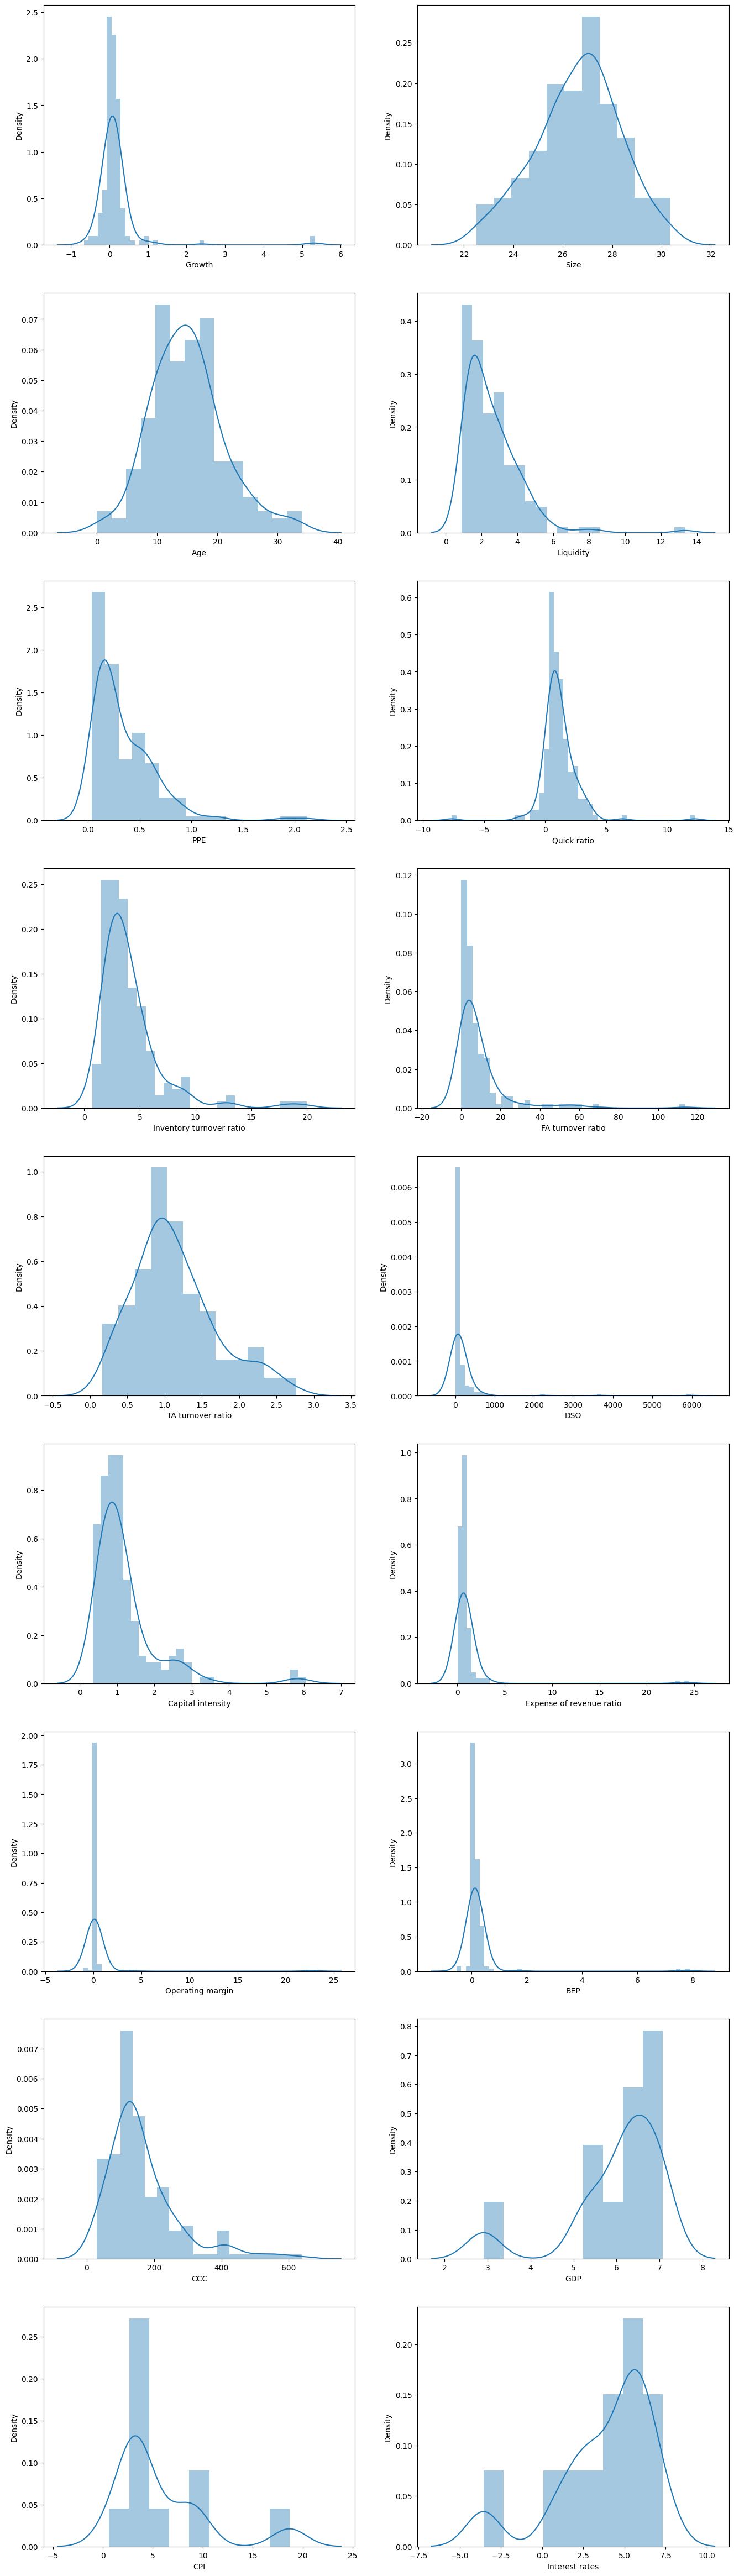

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP',  'CCC', 'GDP', 'CPI', 'Interest rates'])

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,169.000000,170.000000,172.000000,172.000000,176.000000,172.000000,176.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.619867,0.122002,0.337047,2.517362,15.000000,1.116161,4.027559,8.514278,1.134400,131.947442,1.163259,0.825007,0.214125,0.223229,164.346890,6.001623,5.821202,3.797918,0.477273
std,1.684440,0.341027,0.268796,1.344606,6.089804,1.172888,2.417542,11.013788,0.558281,261.360834,0.725517,1.000693,0.890421,0.837904,101.474840,1.134186,4.822571,2.952332,0.500908
min,22.502295,-0.667648,0.037420,0.886635,0.000000,-3.449615,0.719574,0.032883,0.165447,0.838415,0.361477,0.011470,-1.067657,-0.552558,29.237244,2.905836,0.631201,-3.551709,0.000000
25%,25.617494,-0.018484,0.131642,1.467765,11.000000,0.462382,2.449043,2.101456,0.794655,34.583219,0.690360,0.438053,0.053125,0.049417,102.742318,5.421883,2.795824,2.294892,0.000000
50%,26.808364,0.074696,0.228347,2.165178,15.000000,0.919286,3.392990,4.605871,1.032837,59.145292,0.968248,0.624319,0.101428,0.095866,135.992167,6.240303,3.539628,4.825874,0.000000
75%,27.712923,0.194790,0.512594,3.174215,18.000000,1.584596,4.767077,10.255332,1.448520,111.618796,1.258449,0.891867,0.158076,0.197766,204.623202,6.812246,9.094703,5.814896,1.000000
max,30.341455,2.051533,1.268739,7.253523,34.000000,5.715702,12.795695,51.071111,2.766430,1849.694627,3.850517,8.652647,7.748101,7.906537,490.738874,7.075789,18.677732,7.322258,1.000000


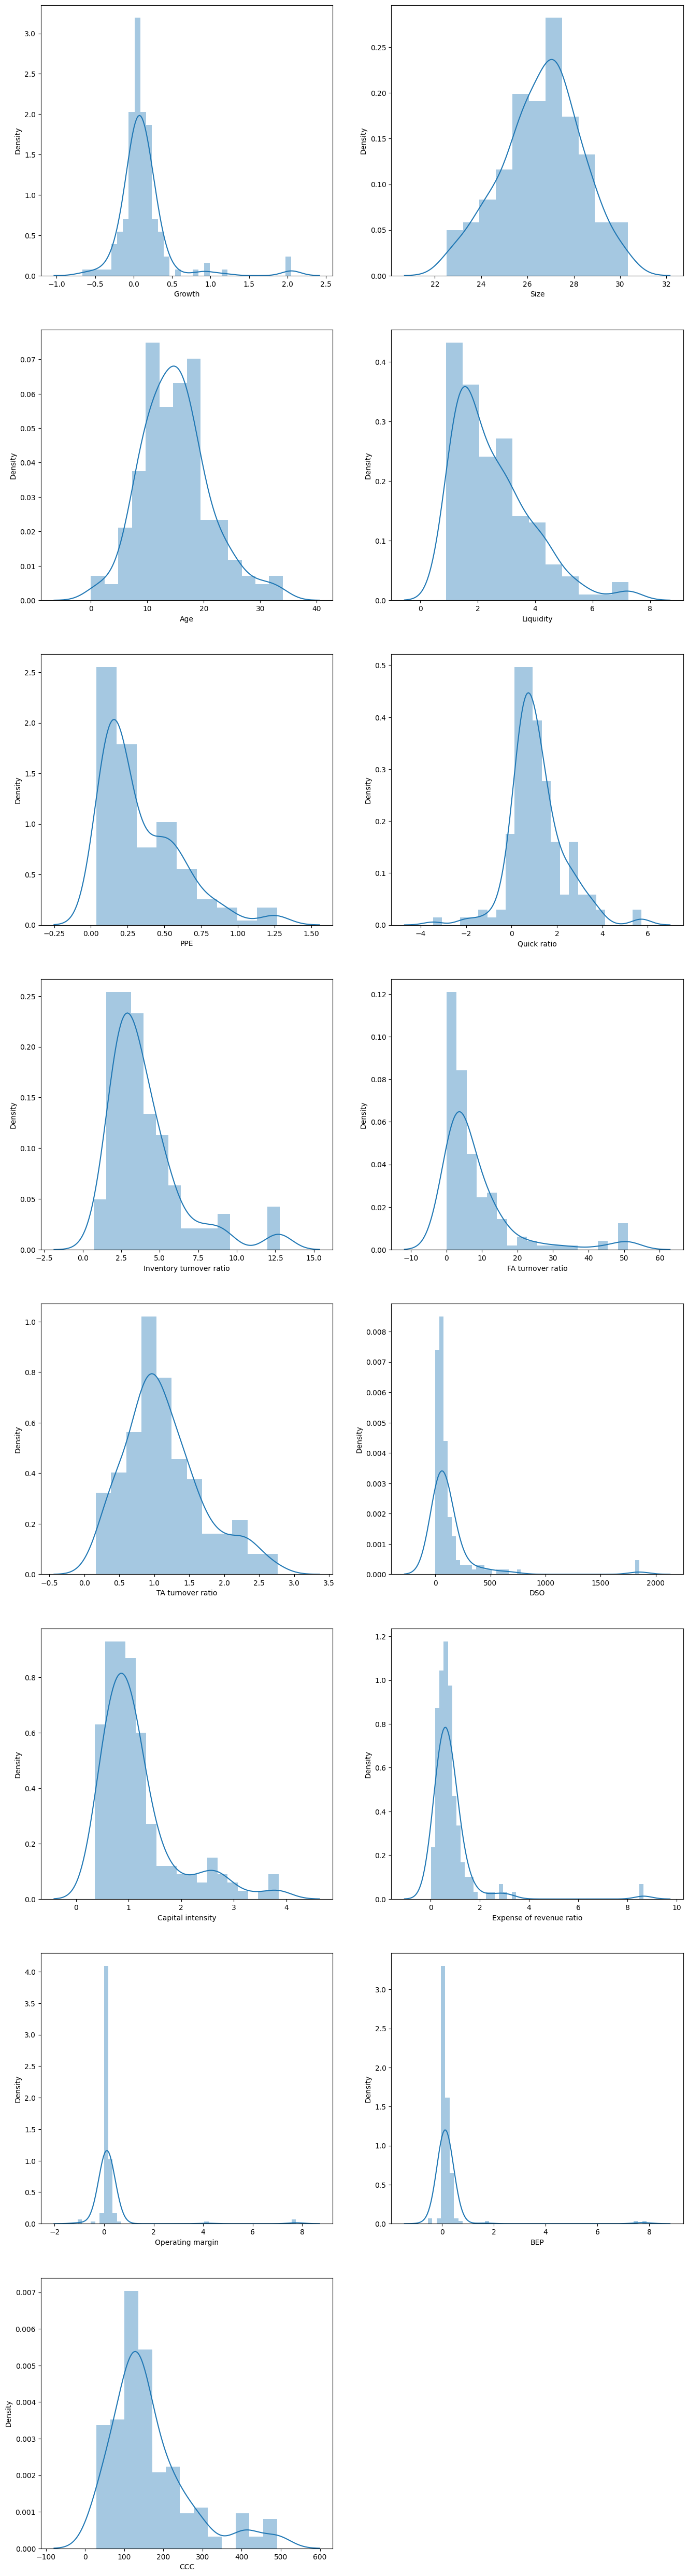

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity',  'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin',  'BEP', 'CCC'])

In [ ]:
(data.isnull().sum()/176*100).sort_values(axis=0, ascending=False)

Size                        3.977273
Growth                      3.409091
TA turnover ratio           2.272727
BEP                         2.272727
Operating margin            2.272727
Expense of revenue ratio    2.272727
Capital intensity           2.272727
DSO                         2.272727
FA turnover ratio           2.272727
Quick ratio                 2.272727
Liquidity                   2.272727
PPE                         2.272727
Inventory turnover ratio    0.000000
Age                         0.000000
CCC                         0.000000
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
Target                      0.000000
dtype: float64

<Axes: >

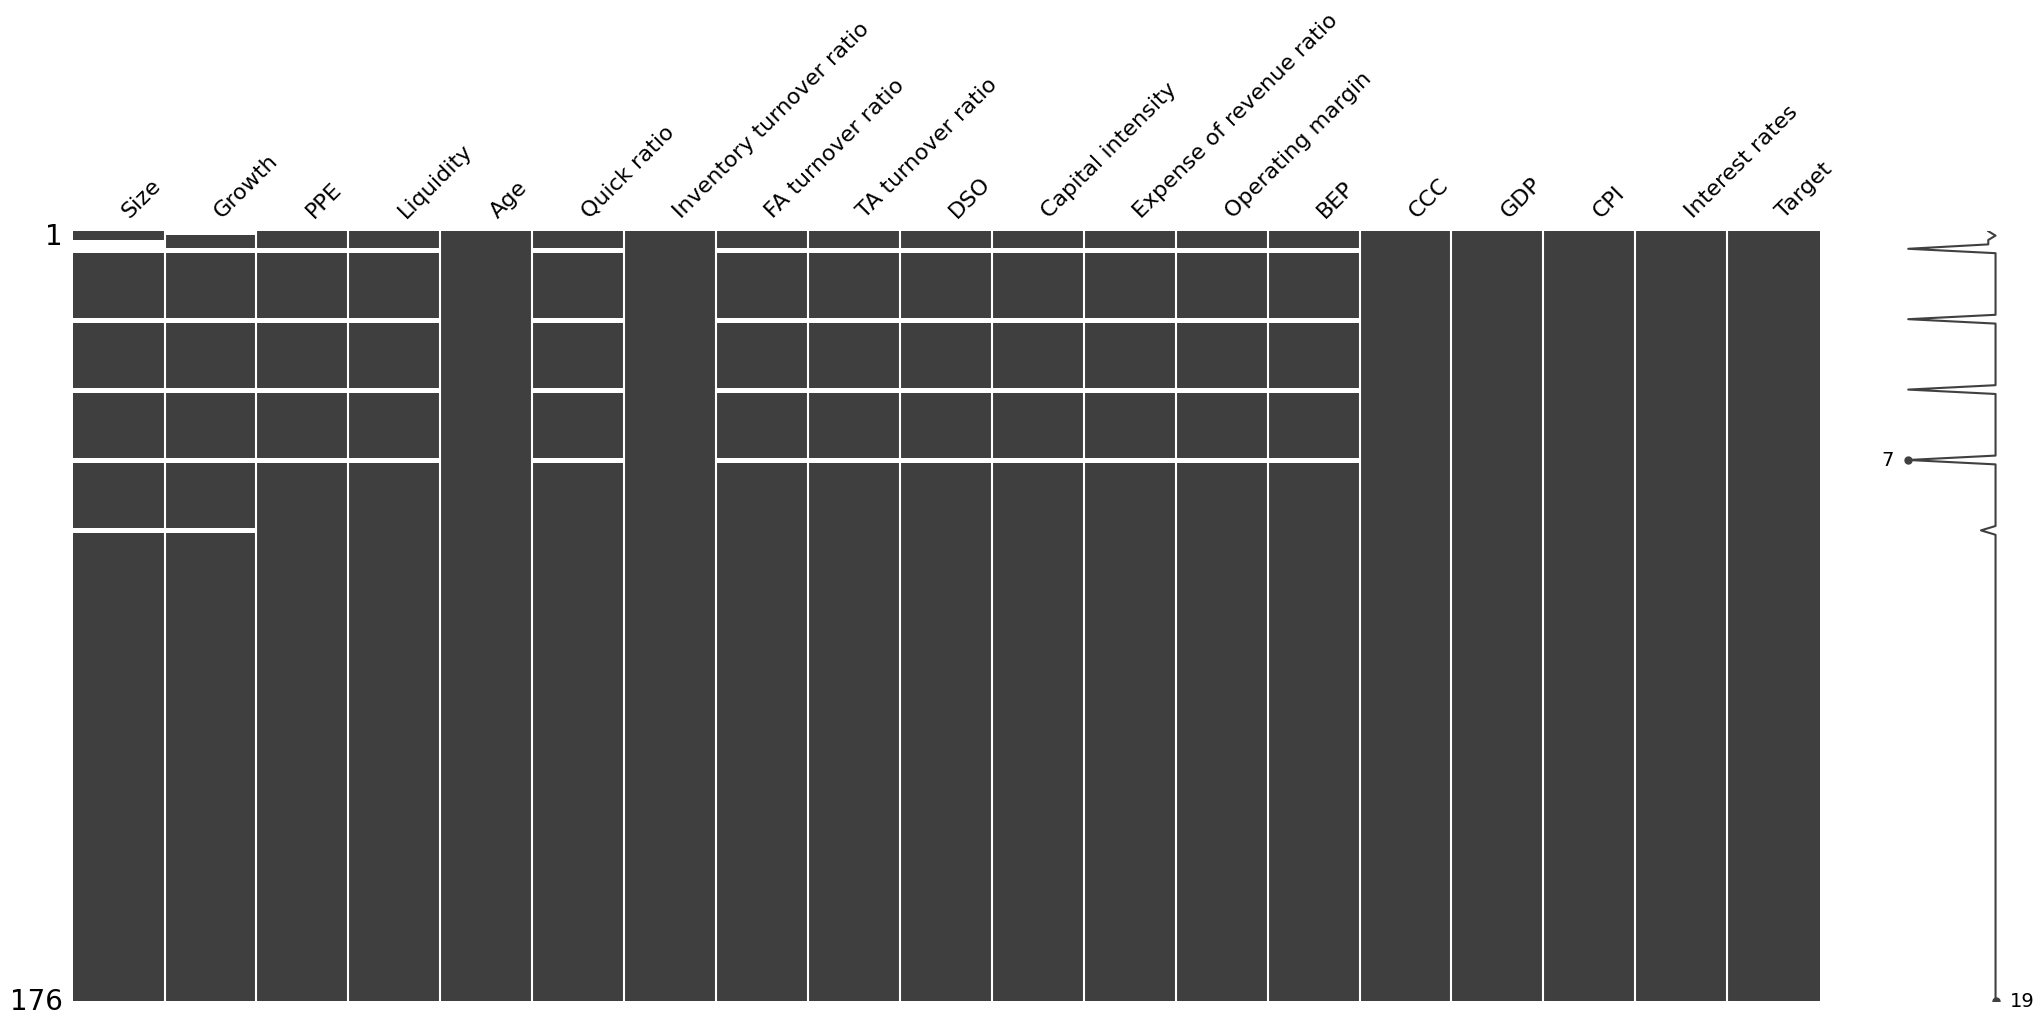

In [ ]:
import missingno

missingno.matrix(data)

In [ ]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(168, 19)
0


In [ ]:
# Define a function to replace outliers with 1st or 3rd quantile
def replace_outliers(new_data, q1=0.25, q3=0.75):
    """
    Replace outliers in a dataframe using the Interquartile Range (IQR) method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing the data
    q1 : float
        The first quartile (default is 0.25)
    q3 : float
        The third quartile (default is 0.75)

    Returns:
    --------
    pandas.DataFrame
        Dataframe with outliers replaced with 1st or 3rd quantile
    """
    # Calculate the interquartile range (IQR) for each column
    q1_vals = new_data.quantile(q=q1)
    q3_vals = new_data.quantile(q=q3)
    iqr = q3_vals - q1_vals

    # Determine the upper and lower bounds for outliers
    lower_bound = (q1_vals - 1.5 * iqr)
    upper_bound = (q3_vals + 1.5 * iqr)

    # Replace outliers with the lower or upper bound
    for col in new_data.columns:
        new_data.loc[new_data[col] < lower_bound[col], col] = lower_bound[col]
        new_data.loc[new_data[col] > upper_bound[col], col] = upper_bound[col]

    return new_data

# Replace outliers using the IQR method
new_data = replace_outliers(new_data)

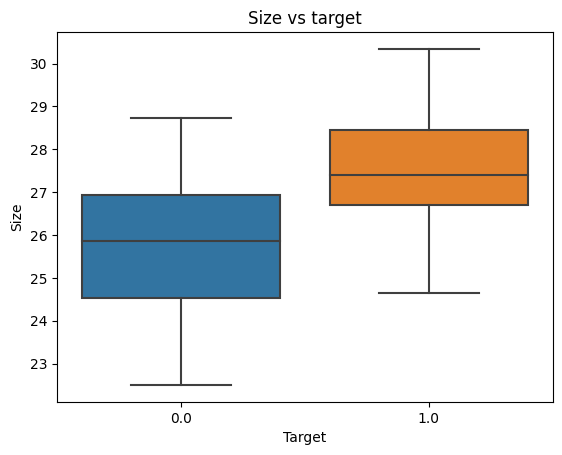

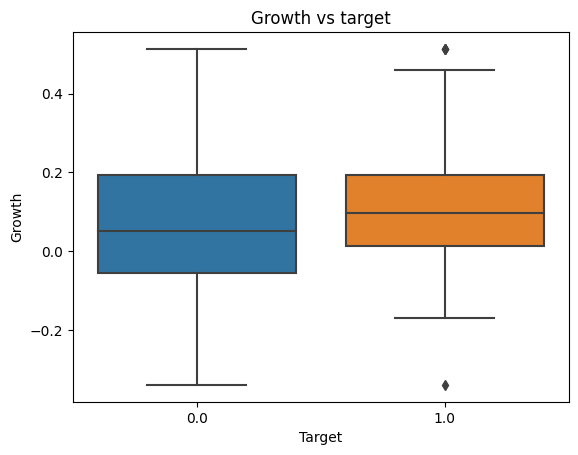

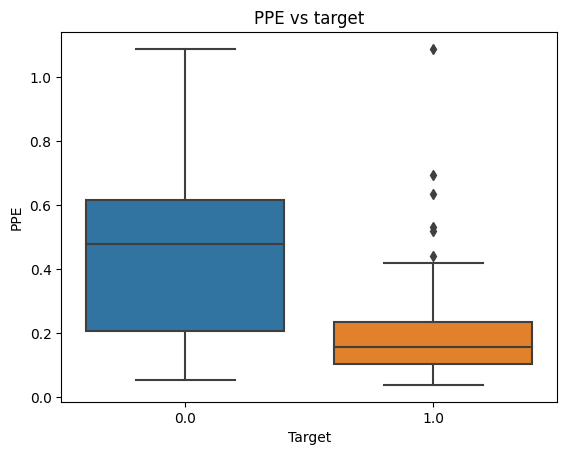

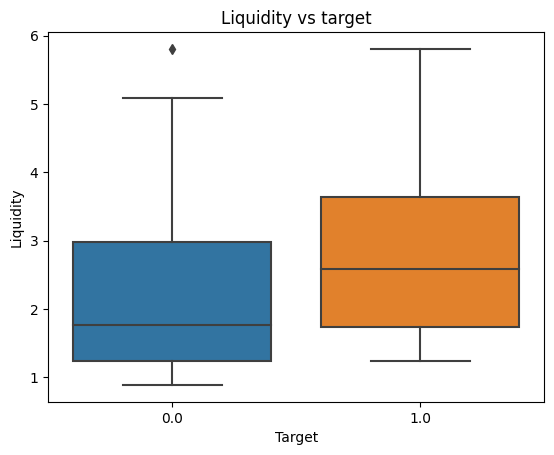

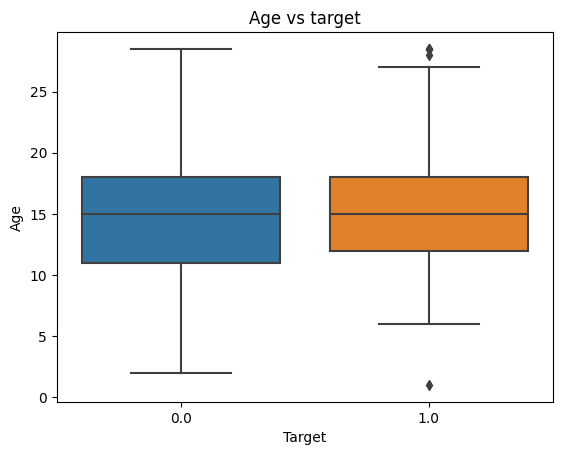

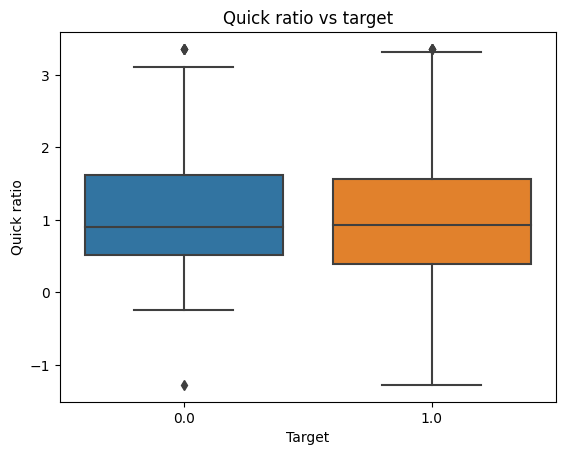

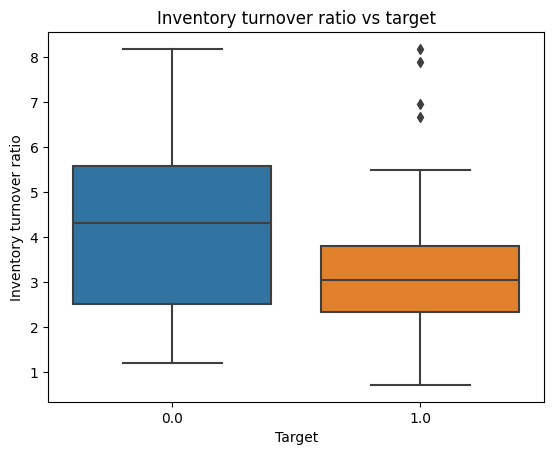

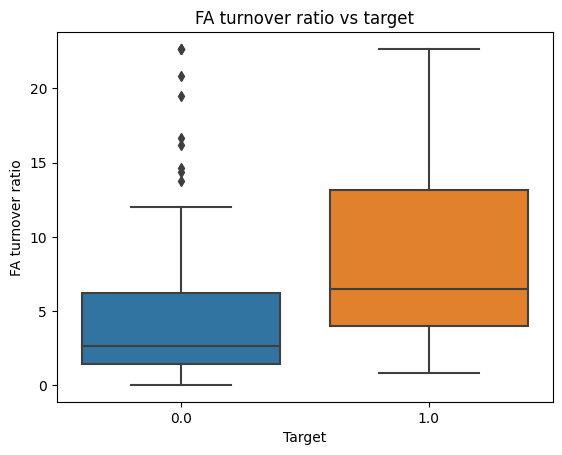

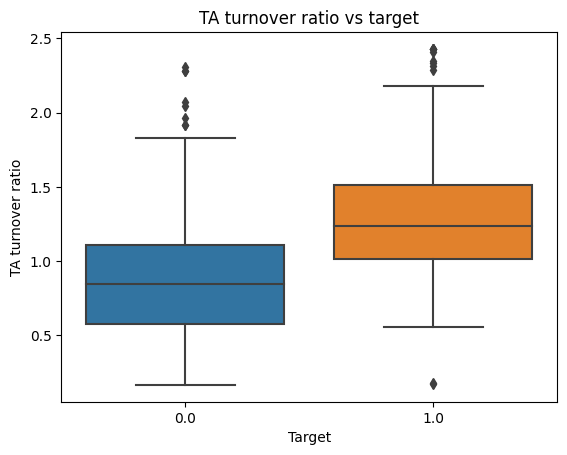

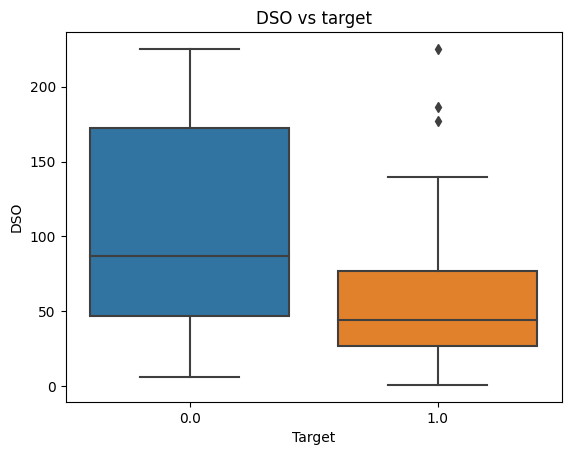

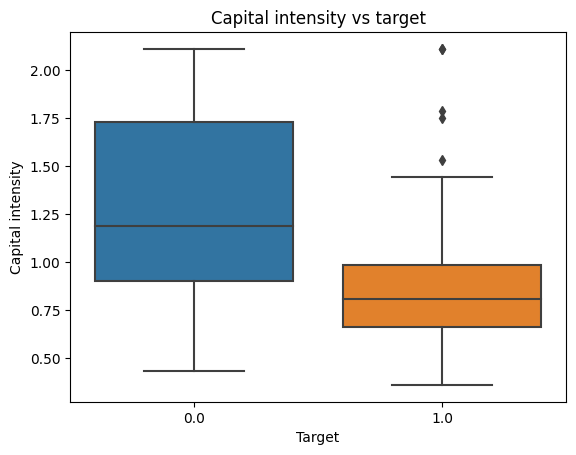

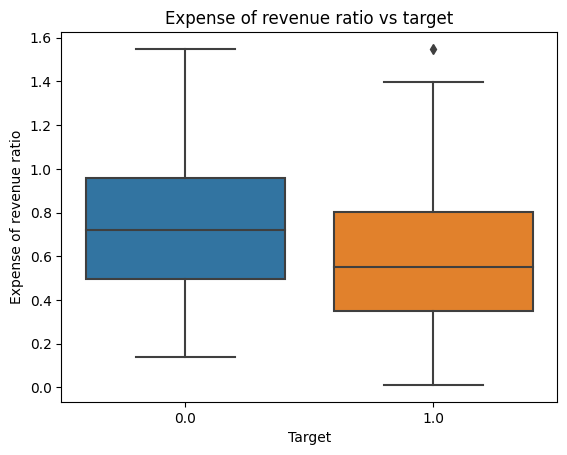

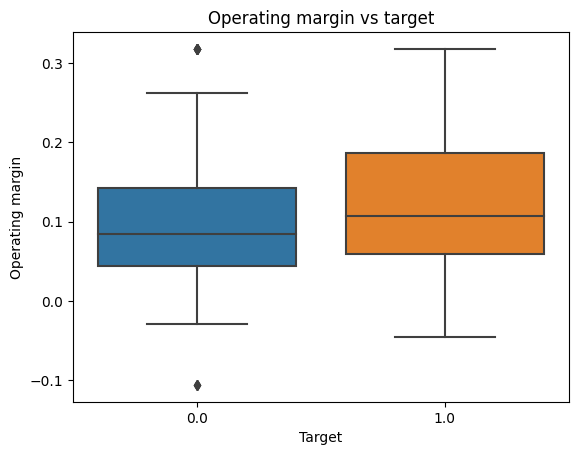

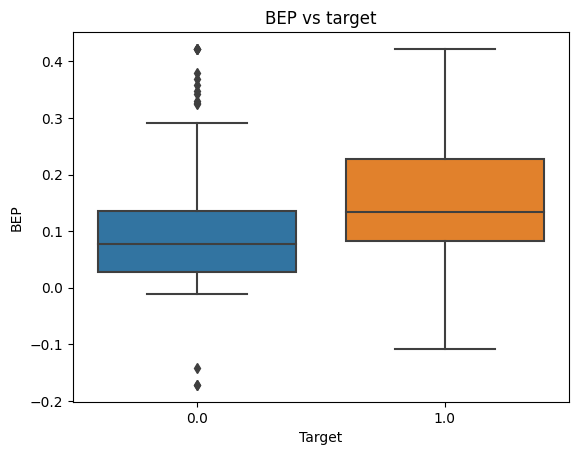

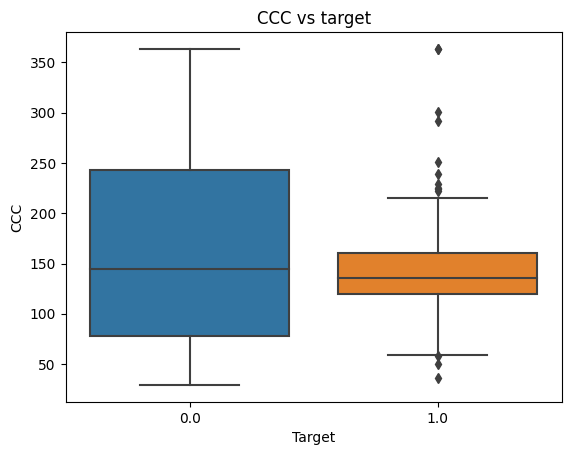

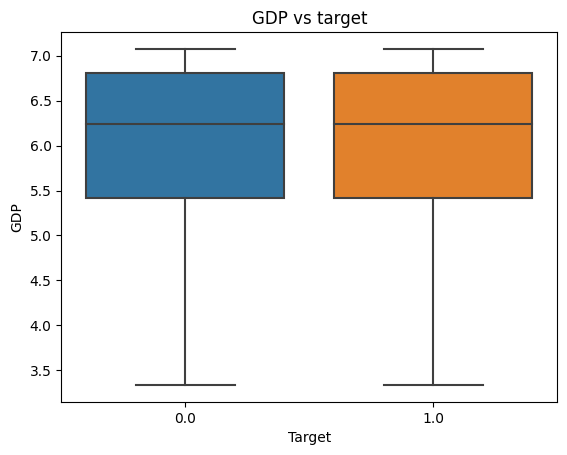

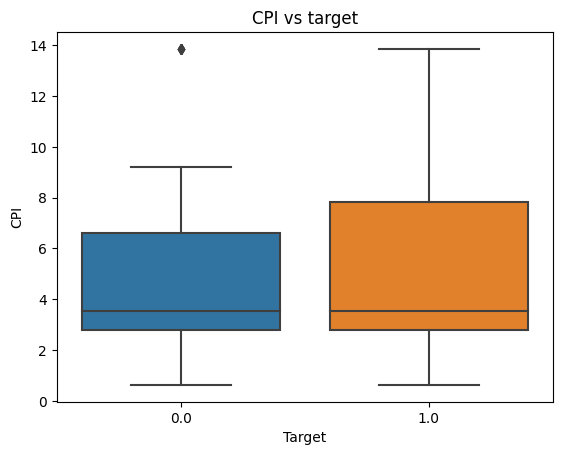

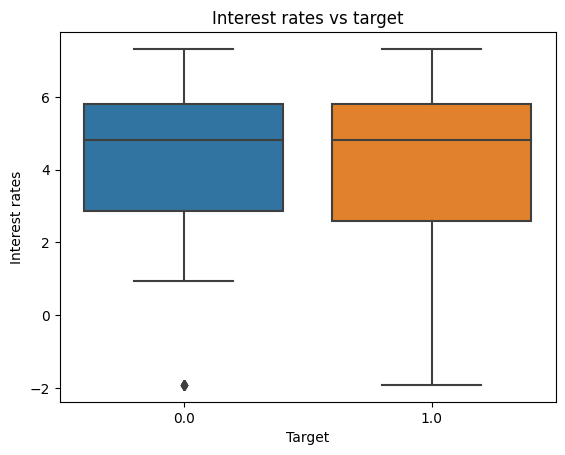

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot each variable against the target variable
for col in new_data.columns[:-1]:
    sns.boxplot(x='Target', y=col, data=new_data)
    plt.title(col + " vs target")
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from sklearn import preprocessing

X = new_data.drop('Target', axis=1)
y = new_data.Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

In [ ]:
from sklearn.decomposition import PCA

# instantiate PCA with n_components=10
pca = PCA(n_components=10)

# fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# create a new dataframe with the transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


Best parameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Best cross-validation score: 0.84

Random Forest:
[[14  4]
 [ 6 10]]
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74        18
         1.0       0.71      0.62      0.67        16

    accuracy                           0.71        34
   macro avg       0.71      0.70      0.70        34
weighted avg       0.71      0.71      0.70        34



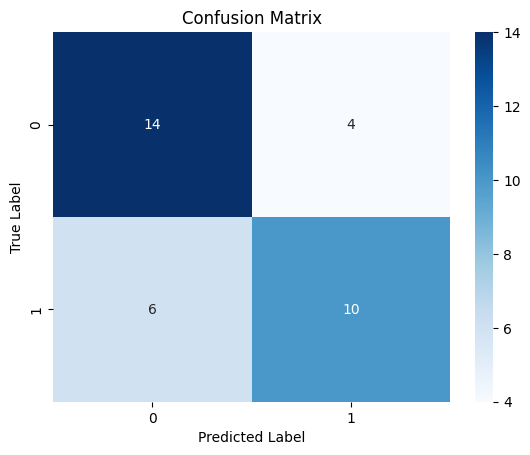

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train_pca_df, y_train, X_test_pca_df, y_test)

Best parameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Best cross-validation score: 0.90

Random Forest:
[[16  2]
 [ 4 12]]
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        18
         1.0       0.86      0.75      0.80        16

    accuracy                           0.82        34
   macro avg       0.83      0.82      0.82        34
weighted avg       0.83      0.82      0.82        34



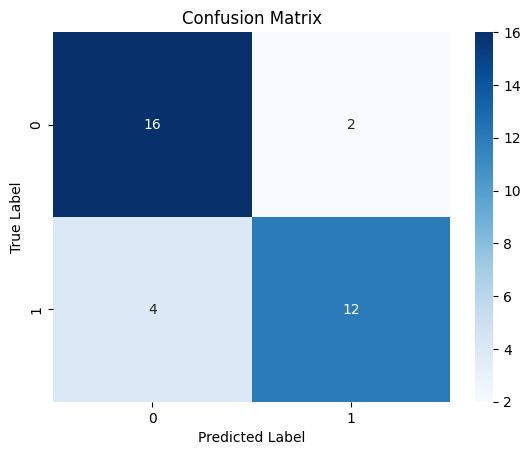

RandomForestClassifier(max_depth=4, min_samples_split=4, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train, y_train, X_test, y_test)


Logistic regression:
[[16  2]
 [ 7  9]]
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78        18
         1.0       0.82      0.56      0.67        16

    accuracy                           0.74        34
   macro avg       0.76      0.73      0.72        34
weighted avg       0.75      0.74      0.73        34



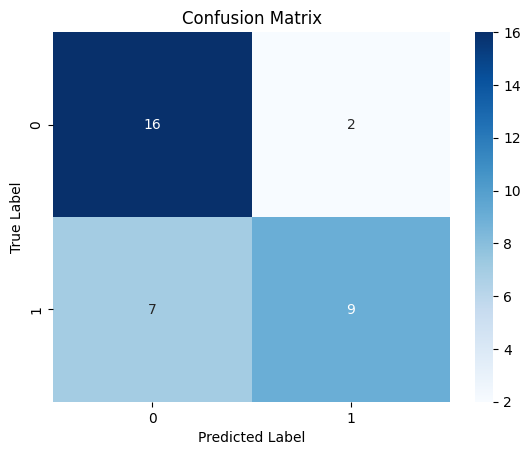

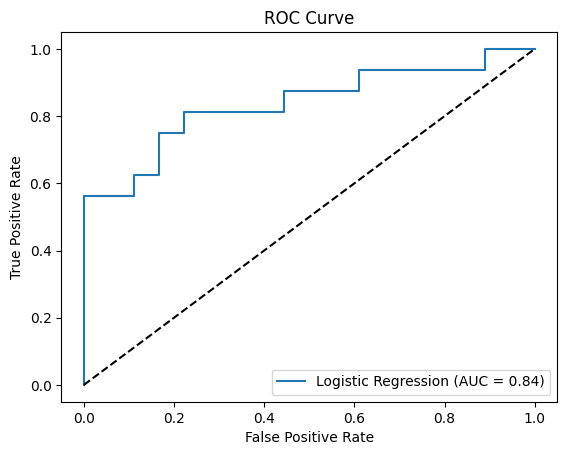

LogisticRegression(random_state=38)

In [ ]:
#baseline
def baseline_model(X_train, y_train, X_test, y_test):
    baseline = LogisticRegression(random_state=38)
    baseline.fit(X_train, y_train)

    # predict on test set
    y_pred_baseline = baseline.predict(X_test)

    # print evaluation metrics
    print("\nLogistic regression:")
    print(confusion_matrix(y_test, y_pred_baseline))
    print(classification_report(y_test, y_pred_baseline))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, cmap="Blues", fmt="d",
                    xticklabels=["0", "1"],
                    yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # predict probabilities for test set
    y_pred_prob_baseline = baseline.predict_proba(X_test)[:, 1]

    # calculate ROC-AUC score
    roc_auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_baseline)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_baseline))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return baseline
#baseline report
baseline_model(X_train, y_train, X_test, y_test)

In [ ]:
from keras import feature_column
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
scaler = MinMaxScaler()
feature= ['Size', 'Growth', 'PPE','Liquidity', 'Quick ratio','Capital intensity','TA turnover ratio',
          'Operating margin','Expense of revenue ratio','DSO','FA turnover ratio','BEP','Inventory turnover ratio','CCC','Age', 'GDP','CPI','Interest rates']
X = new_data[feature]
y = new_data["Target"]

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(y)]

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scale data
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=MLPClassifier(hidden_layer_sizes=[100,100], alpha=5, random_state=0, solver='lbfgs').fit(X_train_scaled,y_train)
print('Accuracy of NN classifier on training set: %.4f %%' % (100*clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on testing set: %.4f %%' % (100*clf.score(X_test_scaled, y_test)))


Accuracy of NN classifier on training set: 84.6154 %
Accuracy of NN classifier on testing set: 80.3922 %


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 82.35%
K-Nearest Neighbors: 70.59%
Decision Tree: 72.55%
Support Vector Machine (Linear Kernel): 78.43%
Support Vector Machine (RBF Kernel): 72.55%
Neural Network: 52.94%
Random Forest: 76.47%


In [ ]:
y_test.value_counts() / len(y_test)

0.0    0.509804
1.0    0.490196
Name: Target, dtype: float64

In [ ]:
y.value_counts() / len(y)

0.0    0.505952
1.0    0.494048
Name: Target, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 65 that accuracy is 0.8811051693404635


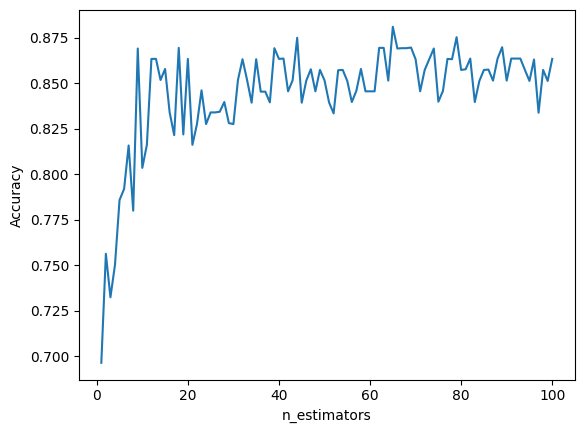

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 65 that accuracy is 0.8811051693404635


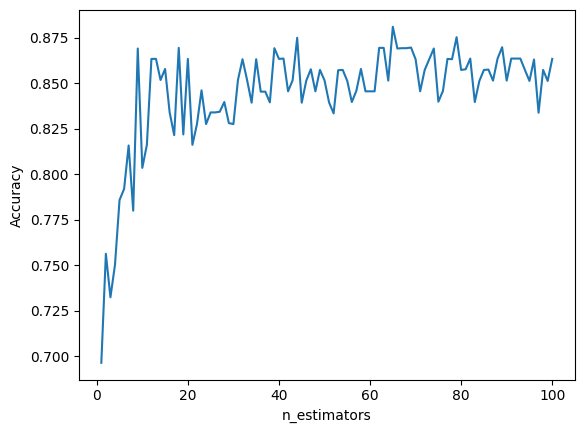

In [ ]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

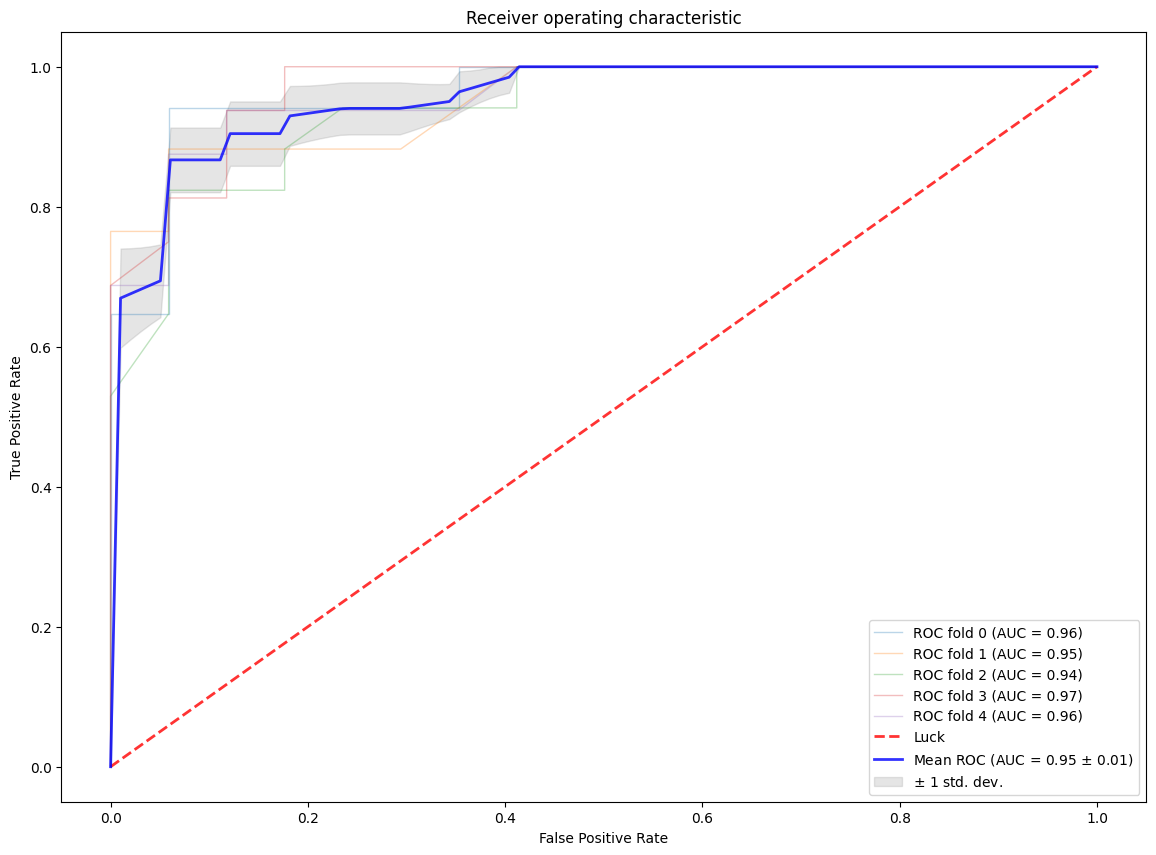

,AUC Train,AUC Test
0,1.0,0.961938
1,1.0,0.951557
2,1.0,0.939446
3,1.0,0.968750
4,1.0,0.957721


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

Inventory turnover ratio    0.128300
Size                        0.126704
PPE                         0.112457
CCC                         0.082739
TA turnover ratio           0.072334
FA turnover ratio           0.069318
Capital intensity           0.066750
Liquidity                   0.065072
DSO                         0.059982
Expense of revenue ratio    0.043666
Quick ratio                 0.041925
BEP                         0.040401
Operating margin            0.022691
Growth                      0.022504
Age                         0.016427
CPI                         0.013875
Interest rates              0.007585
GDP                         0.007268
dtype: float64


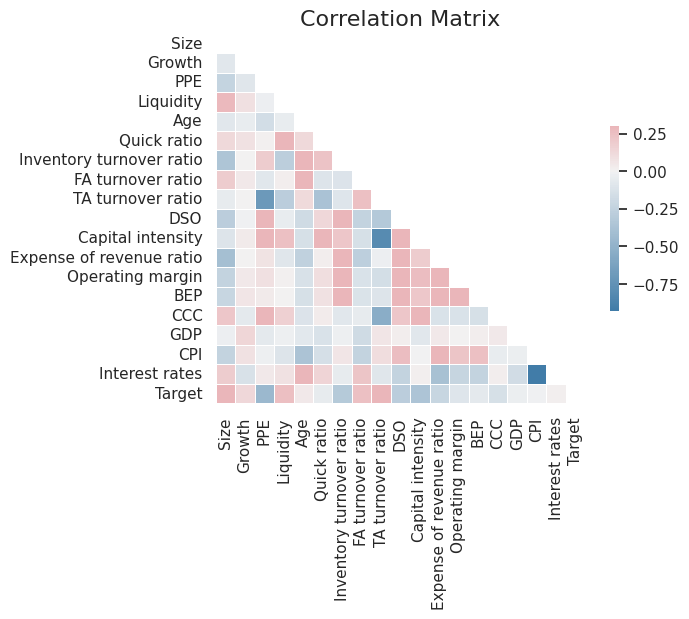

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

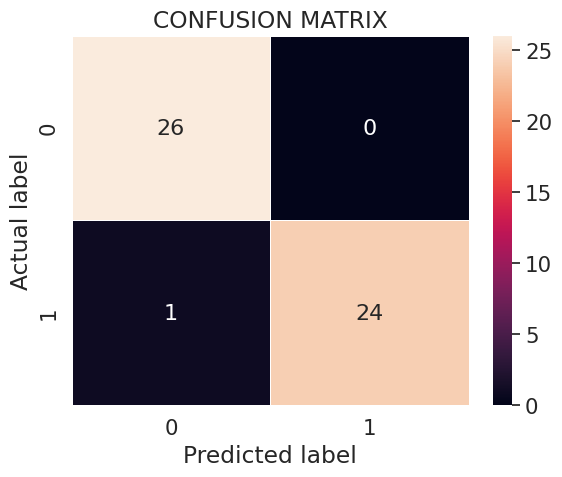

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        26
         1.0       1.00      0.96      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [ ]:
y_pred

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.])